# Hierarchical Clustering-Agglomerative




# Importing Libraries and Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Pokemon.csv')

In [3]:
dataset.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
X = dataset.iloc[:,[5,6,7]].values

In [5]:
print(X)

[[ 45  49  49]
 [ 60  62  63]
 [ 80  82  83]
 ...
 [100  80  80]
 [100 165 150]
 [100  85  80]]


## Using the dendrogram to find the optimal number of clusters


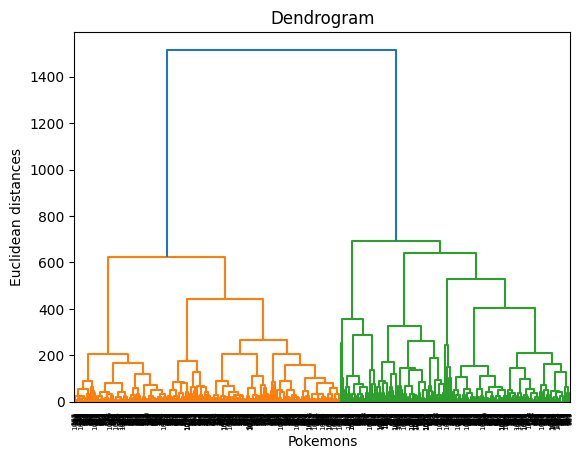

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Pokemons')
plt.ylabel('Euclidean distances')
plt.show()

##### As we see from dendograms diagram that optimal number of clusters are 2

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
print(y_hc)

[1 1 0 ... 0 0 0]


In [10]:
dataset['cluster'] = pd.DataFrame(y_hc)

## Visualising the clusters

In [11]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= dataset['hp'],
    y= dataset['attack'],
    z= dataset['defense'],
    mode='markers',
     marker=dict(
        color = dataset['cluster'],
        size= 10,
        line=dict(
            color= dataset['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Hp'),
            yaxis = dict(title  = 'Attack'),
            zaxis = dict(title  = 'Defense')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

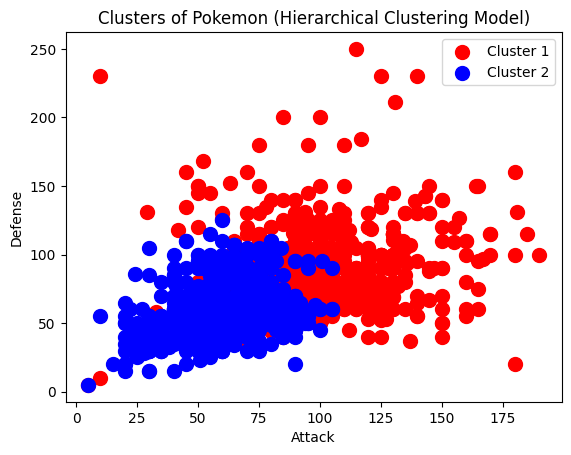

In [13]:
X = dataset.iloc[:, [6,7]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of Pokemon (Hierarchical Clustering Model)')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()



In [15]:
dataset.to_csv("segmented_pokemons.csv", index = False)